## e002 EDA
 * basic EDA
 * high pass filter
 * denoising

In [3]:
import pandas as pd
import numpy as np
import gc
import pyarrow.parquet as pq
from multiprocessing import Pool

import scipy
from scipy import signal
from scipy.signal import butter

from matplotlib import pyplot as plt
import seaborn as sns

import sys
sys.path.append('../../guchio_utils/')

In [2]:
#plt.rcParams['font.family'] = 'IPAPGothic' #全体のフォントを設定
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%config InlineBackend.figure_formats = {'png', 'retina'}
%load_ext autoreload
%autoreload 1

In [3]:
#trn_df = pd.read_parquet('../inputs/origin/train.parquet.zip', compression='zip')
trn_df = pq.read_pandas('../inputs/origin/train.parquet').to_pandas()
trn_meta_df = pd.read_csv('../inputs/origin/metadata_train.csv')

In [5]:
trn_df

,0,1,2,3,4,5,6,7,8,9,...,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711
0,18,1,-19,-16,-5,19,-15,15,-1,-16,...,18,-22,12,8,13,6,-21,-15,-9,20
1,18,0,-19,-17,-6,19,-17,16,0,-15,...,17,-21,12,8,14,7,-19,-15,-8,21
2,17,-1,-20,-17,-6,19,-17,15,-3,-15,...,16,-21,13,8,15,8,-18,-14,-8,22
3,18,1,-19,-16,-5,20,-16,16,0,-15,...,16,-21,12,8,15,8,-19,-14,-7,23
4,18,0,-19,-16,-5,20,-17,16,-2,-14,...,17,-22,12,8,15,8,-18,-14,-8,23
5,18,0,-20,-15,-4,20,-16,15,-2,-12,...,17,-22,12,8,15,8,-19,-14,-8,22
6,19,1,-18,-16,-5,20,-16,16,-1,-13,...,18,-22,12,8,15,8,-19,-14,-8,22
7,18,0,-19,-17,-7,18,-17,15,-2,-15,...,17,-22,11,7,13,6,-20,-14,-8,22
8,18,0,-20,-18,-7,18,-16,15,-2,-16,...,17,-23,11,8,13,6,-21,-14,-8,22
9,17,0,-19,-17,-7,18,-17,17,-1,-14,...,16,-22,11,7,13,6,-21,-14,-8,22


In [6]:
trn_meta_df

,signal_id,id_measurement,phase,target
0,0,0,0,0
1,1,0,1,0
2,2,0,2,0
3,3,1,0,1
4,4,1,1,1
5,5,1,2,1
6,6,2,0,0
7,7,2,1,0
8,8,2,2,0
9,9,3,0,0


In [7]:
trn_df.info(), trn_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 8712 entries, 0 to 8711
dtypes: int8(8712)
memory usage: 6.5 GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8712 entries, 0 to 8711
Data columns (total 4 columns):
signal_id         8712 non-null int64
id_measurement    8712 non-null int64
phase             8712 non-null int64
target            8712 non-null int64
dtypes: int64(4)
memory usage: 272.3 KB


(None, None)

## basic EDA 

### やりたいこと
 * noise 除去
     * HPF
     * LPH
 * FFT 周りでなにか

In [7]:
# 描画用関数定義
from itertools import chain

def _plt_3phase_current(df, meta_df, id_measurement, ax, ylim, fontsize):
    # get info from meta_df
    target_df = meta_df.query(f'id_measurement == {id_measurement}')
    signal_ids = target_df.signal_id.astype(str)
    phase = target_df.phase.tolist()
    targets = target_df.target.tolist()
    plt_df = df.loc[:, signal_ids]
    
    # plot
    for i in range(3):
        ax.plot(plt_df.iloc[:, i], label=f'phase {phase[i]}')
        
    # decoration
    ax.set_title(f'id_measurement: {id_measurement}, targets: {targets}', fontsize=fontsize)
    ax.set_xlabel('time', fontsize=fontsize)
    ax.set_ylabel('signal', fontsize=fontsize)
    ax.legend()
    ax.set_ylim(ylim)
    
    
def plt_3phase_currents(df, meta_df, id_measurements, title=None, height_base=3, width_base=8, col_num=4, ylim=None):
    fontsize = int(height_base * width_base / 2)
    if hasattr(id_measurements, "__iter__"):
        height, width = len(id_measurements)//col_num, col_num
        if len(id_measurements) % col_num != 0:
            height += 1
        fig, axs = plt.subplots(height, width, figsize=(width*width_base, height*height_base, ))
        axs = list(chain.from_iterable(axs))
    else:
        id_measurements = [id_measurements]
        fig = plt.figure(figsize=(width_base, height_base))
        ax = fig.add_subplot(111)
        axs = [ax]
        
    for i, id_measurement in enumerate(id_measurements):
        ax = axs[i]
        _plt_3phase_current(df, meta_df, id_measurement, ax, ylim, fontsize)
        
    # decoration
    if title:
        if len(id_measurements) == 1:
            fig.suptitle(title, fontsize=fontsize, va='bottom')
        else:
            fig.suptitle(title, fontsize=fontsize*1.5, va='bottom')
    # apply tight_layout
    fig.tight_layout(rect=[0, 0.08, 1, 0.99])

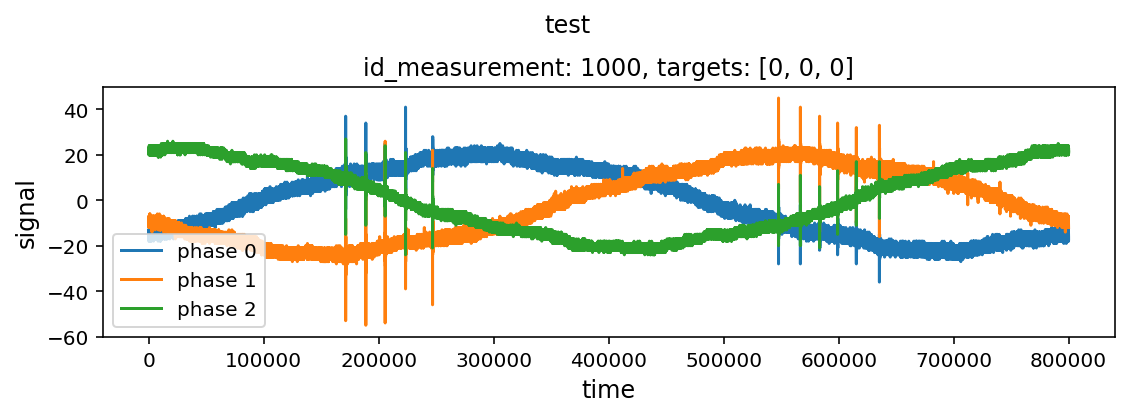

In [9]:
plt_3phase_currents(trn_df, trn_meta_df, 1000, title='test')

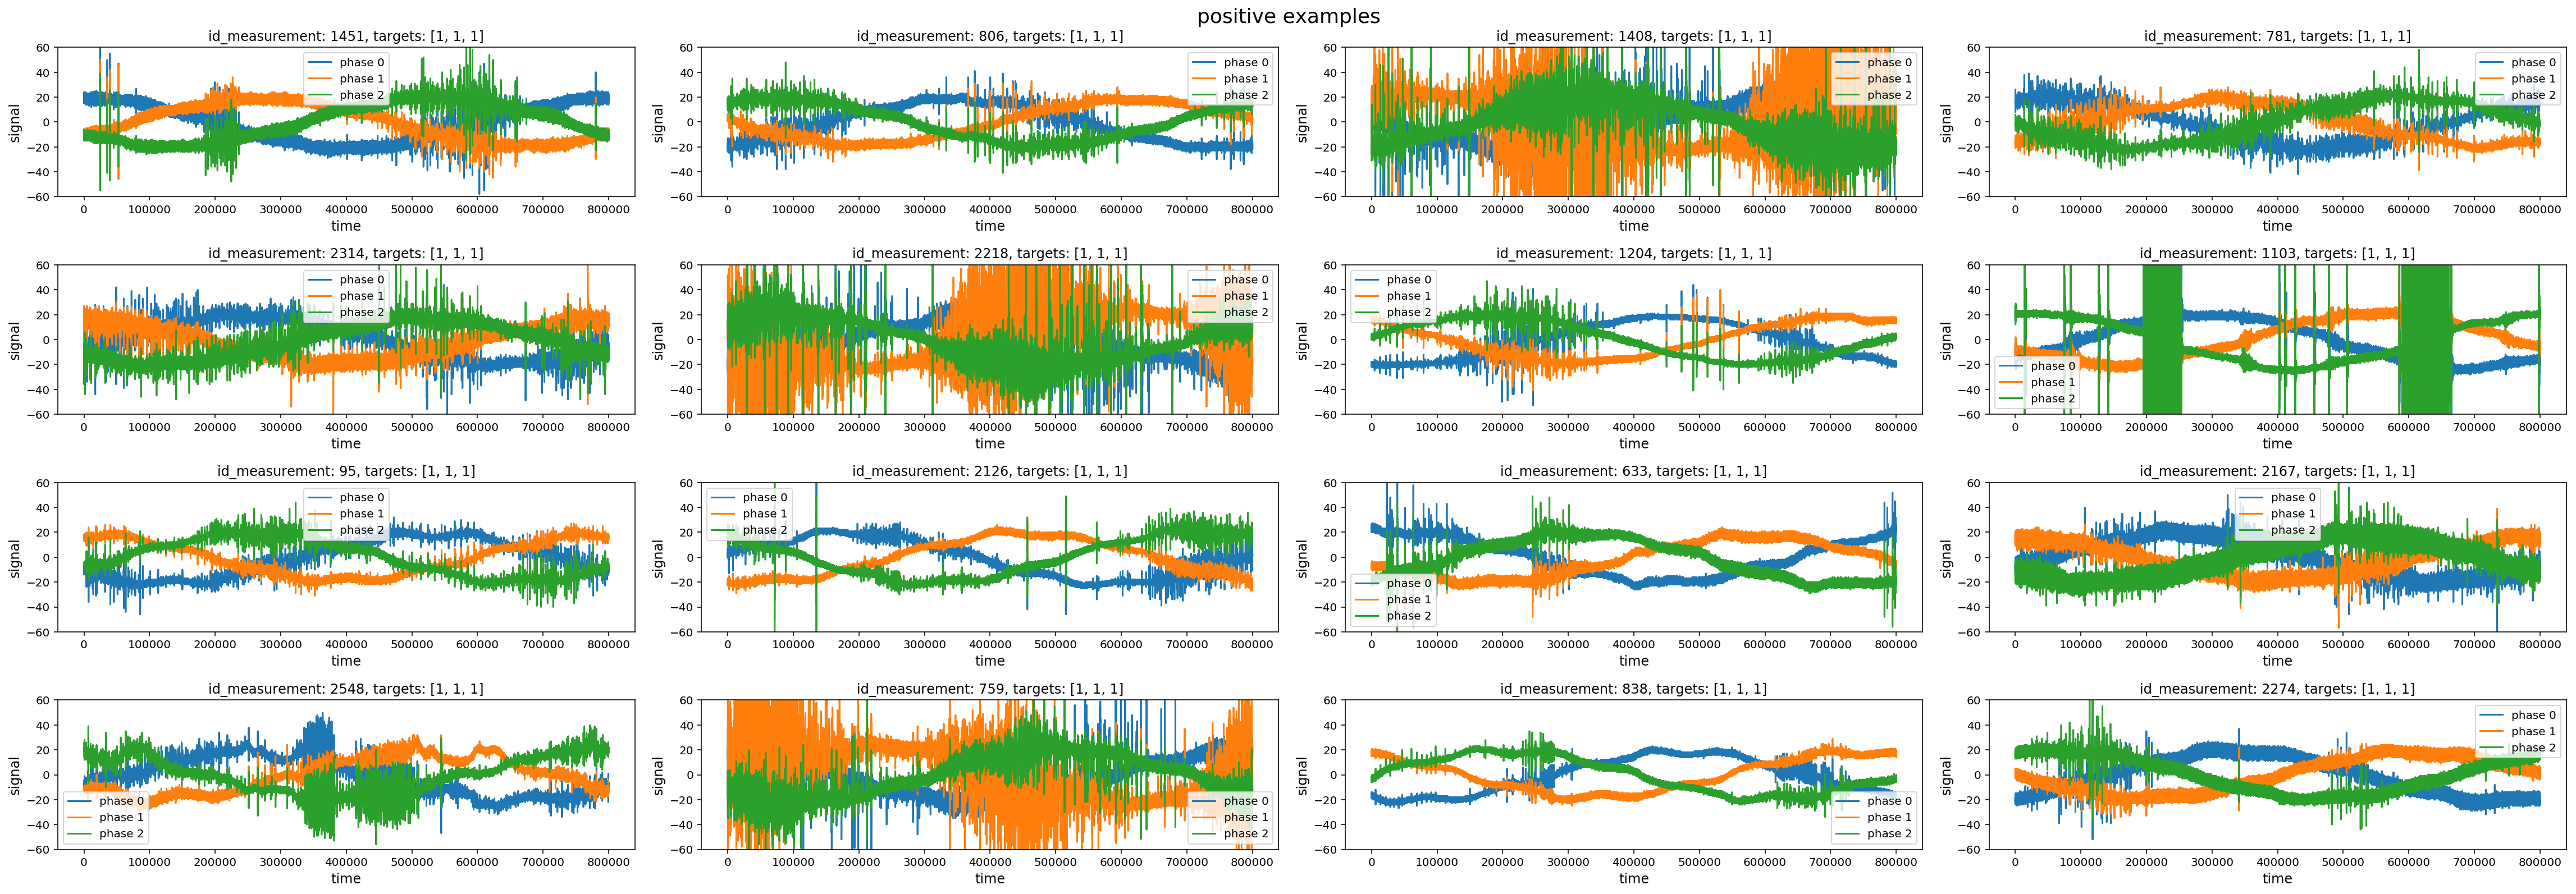

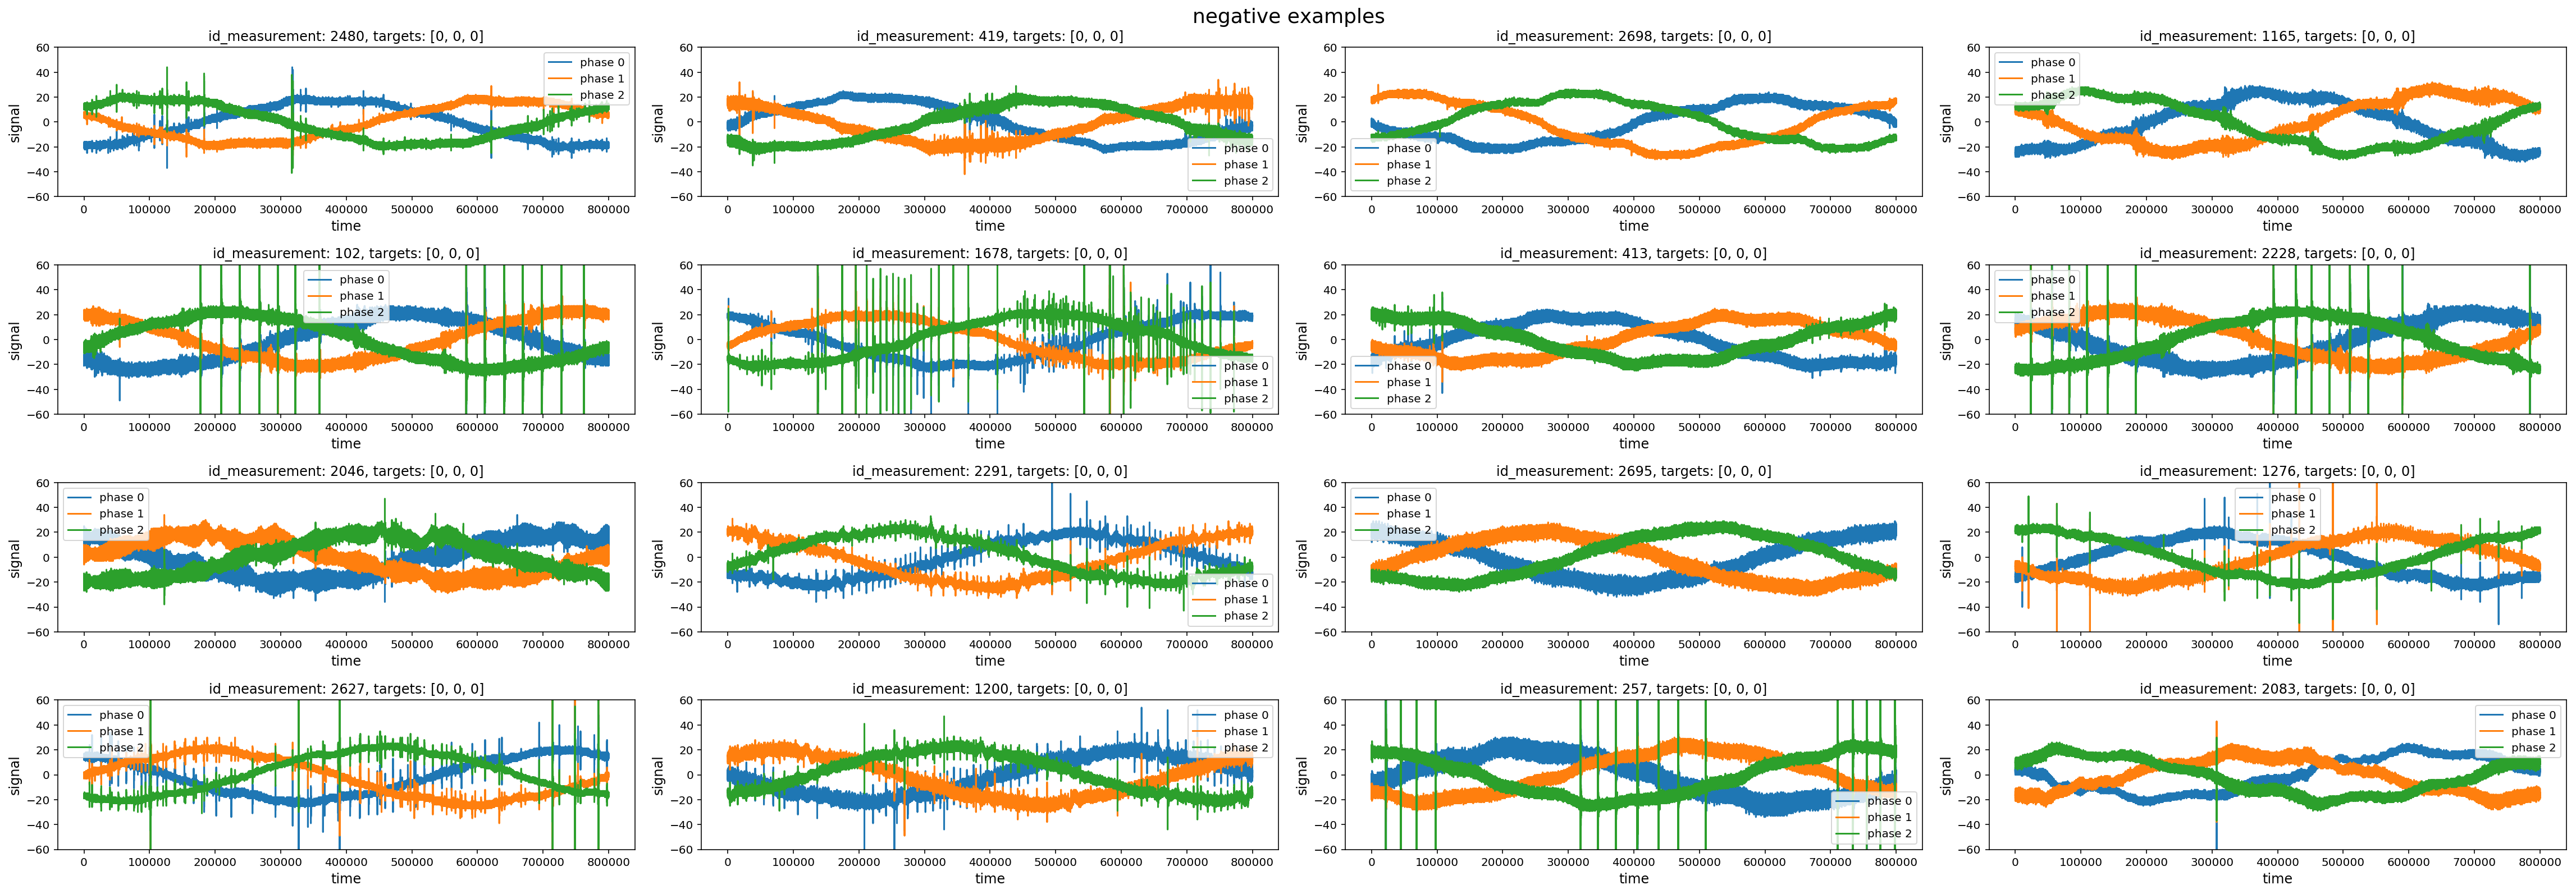

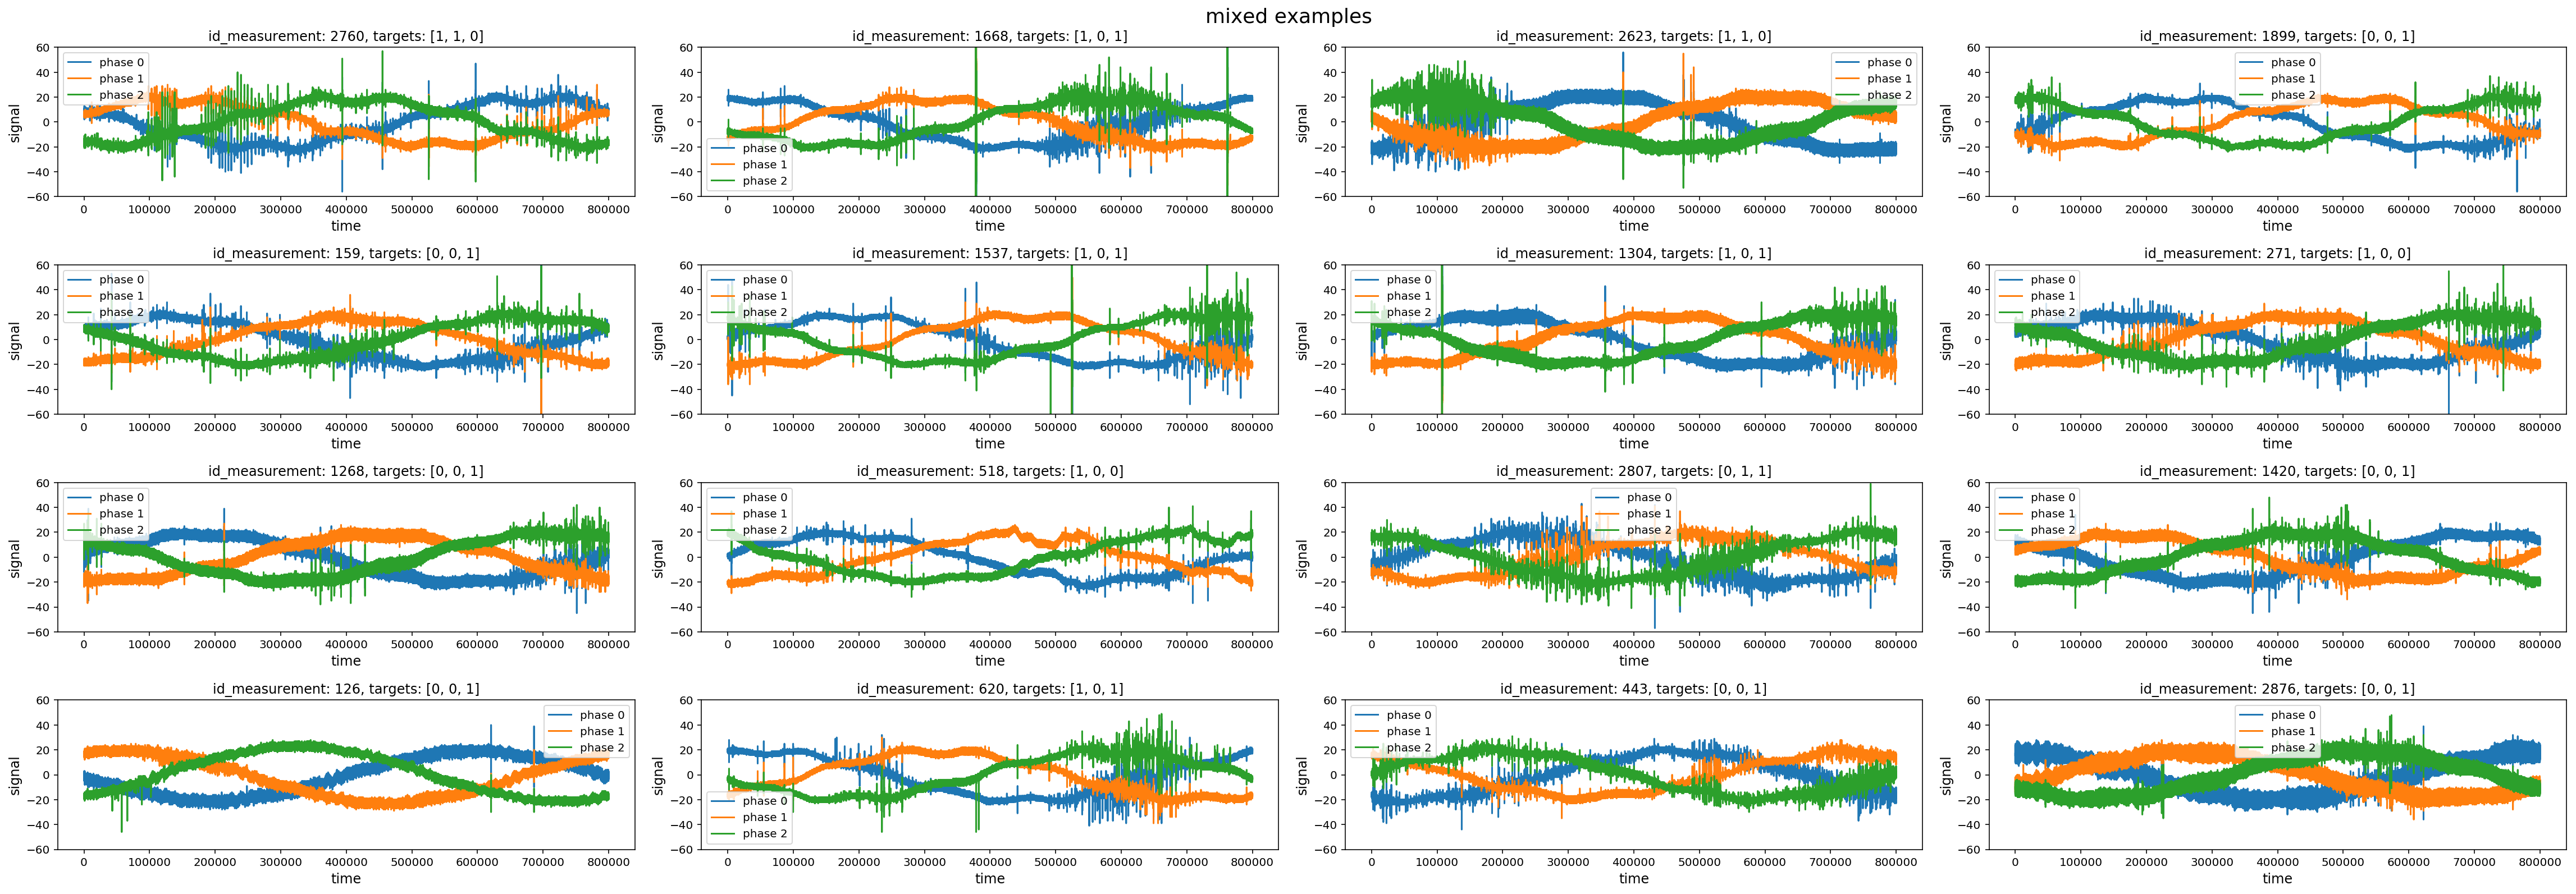

In [8]:
# とりあえず正例、負例をいくつかプロットしてみる
positive_example_ids = trn_meta_df.groupby('id_measurement').sum().query('target == 3').sample(16, random_state=71).index
negative_example_ids = trn_meta_df.groupby('id_measurement').sum().query('target == 0').sample(16, random_state=71).index
mixed_example_ids = trn_meta_df.groupby('id_measurement').sum().query('target != 0 & target != 3').sample(16, random_state=71).index

plt_3phase_currents(trn_df, trn_meta_df, positive_example_ids, title='positive examples', ylim=(-60, 60))
plt.show()

plt_3phase_currents(trn_df, trn_meta_df, negative_example_ids, title='negative examples', ylim=(-60, 60))
plt.show()

plt_3phase_currents(trn_df, trn_meta_df, mixed_example_ids, title='mixed examples', ylim=(-60, 60))
plt.show()

#### HPF と wavelet で flatiron & deoising

In [4]:
# Signal characteristics
# From @randxie https://github.com/randxie/Kaggle-VSB-Baseline/blob/master/src/utils/util_signal.py
SAMPLING_FREQ = 80000/0.02 # 80,000 data points taken over 20 ms

def add_high_pass_filter(x, low_freq=1000, sample_fs=SAMPLING_FREQ):
    """
    From @randxie https://github.com/randxie/Kaggle-VSB-Baseline/blob/master/src/utils/util_signal.py
    Modified to work with scipy version 1.1.0 which does not have the fs parameter
    """
    
    cutoff = 1000
    nyq = 0.5 * sample_fs
    normal_cutoff = cutoff / nyq
    
    # Fault pattern usually exists in high frequency band. According to literature, the pattern is visible above 10^4 Hz.
    # scipy version 1.2.0
    #sos = butter(10, low_freq, btype='hp', fs=sample_fs, output='sos')
    
    # scipy version 1.1.0
    sos = butter(10, normal_cutoff, btype='hp', output='sos')
    filtered_sig = signal.sosfilt(sos, x)

    return filtered_sig

def denoise_signal( x, wavelet='db4', level=1):
    """
    1. Adapted from waveletSmooth function found here:
    http://connor-johnson.com/2016/01/24/using-pywavelets-to-remove-high-frequency-noise/
    2. Threshold equation and using hard mode in threshold as mentioned
    in section '3.2 denoising based on optimized singular values' from paper:
    http://dspace.vsb.cz/bitstream/handle/10084/133114/VAN431_FEI_P1807_1801V001_2018.pdf
    """
    
    # Decompose to get the wavelet coefficients
    coeff = pywt.wavedec( x, wavelet, mode="per" )
    
    # Calculate sigma for threshold as defined in 
    # http://dspace.vsb.cz/bitstream/handle/10084/133114/VAN431_FEI_P1807_1801V001_2018.pdf
    sigma = (1/0.6745) * mad( coeff[-level] )
    #sigma = mad( coeff[-level] )
    
    # Calculte the univeral threshold
    uthresh = sigma * np.sqrt( 2*np.log( len( x ) ) )
    coeff[1:] = ( pywt.threshold( i, value=uthresh, mode='hard' ) for i in coeff[1:] )
    
    # Reconstruct the signal using the thresholded coefficients
    return pywt.waverec( coeff, wavelet, mode='per' )

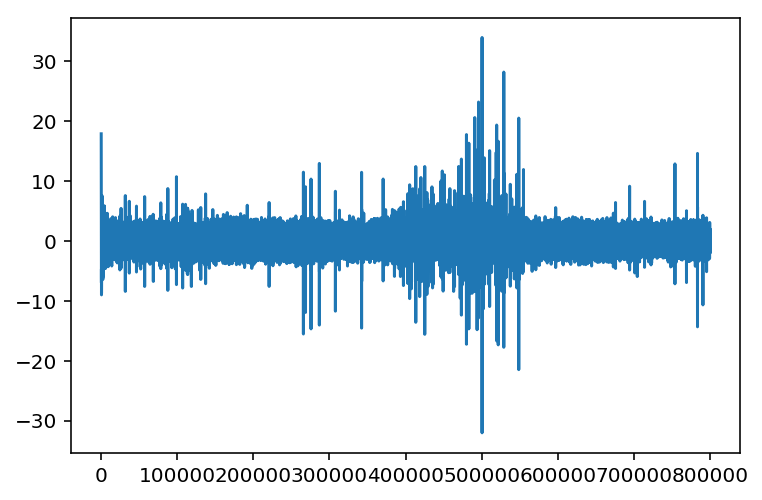

In [19]:
x_hp = add_high_pass_filter(trn_df[str(0)])
plt.plot(x_hp)

#### preprocessing debug

In [4]:
SAMPLING_FREQ = 80000/0.02 # 80,000 data points taken over 20 ms

def add_high_pass_filter(x, low_freq=1000, sample_fs=SAMPLING_FREQ):
    """
    From @randxie https://github.com/randxie/Kaggle-VSB-Baseline/blob/master/src/utils/util_signal.py
    Modified to work with scipy version 1.1.0 which does not have the fs parameter
    """
    signal_id, x = x
    cutoff = 1000
    nyq = 0.5 * sample_fs
    normal_cutoff = cutoff / nyq
    
    # Fault pattern usually exists in high frequency band. According to literature, the pattern is visible above 10^4 Hz.
    # scipy version 1.2.0
    #sos = butter(10, low_freq, btype='hp', fs=sample_fs, output='sos')
    
    # scipy version 1.1.0
    sos = butter(10, normal_cutoff, btype='hp', output='sos')
    filtered_sig = signal.sosfilt(sos, x)

    return signal_id, filtered_sig


def decode_signals_after_pool(pooled_signals):
    signal_ids, signals = [], []
    for pooled_signal in tqdm(pooled_signals):
        signal_ids.append(pooled_signal[0])
        signals.append(pooled_signal[1])
    decoded_signals_df = pd.DataFrame(np.concatenate(signals, axis=1))
    # the column should be int for sorting
    signal_ids = pd.Series(signal_ids).astype(int)
    decoded_signals_df.columns = signal_ids
    decoded_signals_df.sort_values(axis=1, ascending=True, inplace=True)
    # change col type to str
    decoded_signals_df.columns = signal_ids.astype(str)
    return decoded_signals_df


if True:
    with Pool(32) as p:
        trn_series_path = '../inputs/origin/train.parquet'
        print('Loading base data ...')
        trn_series_df = trn_df

        trn_hp_filename = '../inputs/prep/train_hp.pkl.gz'
        print(f'Processing for {trn_hp_filename} ...')
        trn_sigid_series_pairs = [[i, np.array(trn_series_df.loc[:, str(i)])]
                                  for i in range(trn_series_df.shape[1])]
        trn_pooled_hp_signals = p.map(
            add_high_pass_filter, trn_sigid_series_pairs)
        p.close()
        p.join()

Loading base data ...
Processing for ../inputs/prep/train_hp.pkl.gz ...


In [31]:
trn_sigid_series_pairs

[[0, array([18, 18, 17, ..., 17, 19, 17], dtype=int8)],
 [1, array([ 1,  0, -1, ...,  0,  1,  0], dtype=int8)],
 [2, array([-19, -19, -20, ..., -19, -18, -19], dtype=int8)],
 [3, array([-16, -17, -17, ..., -15, -14, -14], dtype=int8)],
 [4, array([-5, -6, -6, ..., -4, -3, -4], dtype=int8)],
 [5, array([19, 19, 19, ..., 21, 22, 21], dtype=int8)],
 [6, array([-15, -17, -17, ..., -16, -16, -17], dtype=int8)],
 [7, array([15, 16, 15, ..., 14, 17, 14], dtype=int8)],
 [8, array([-1,  0, -3, ..., -2, -1, -4], dtype=int8)],
 [9, array([-16, -15, -15, ..., -18, -17, -15], dtype=int8)],
 [10, array([ -9, -10, -10, ..., -12, -11, -10], dtype=int8)],
 [11, array([23, 22, 22, ..., 19, 20, 22], dtype=int8)],
 [12, array([-1,  0, -1, ..., -1, -2, -2], dtype=int8)],
 [13, array([-17, -16, -16, ..., -17, -17, -18], dtype=int8)],
 [14, array([16, 17, 17, ..., 17, 16, 16], dtype=int8)],
 [15, array([-8, -7, -9, ..., -8, -9, -7], dtype=int8)],
 [16, array([17, 17, 16, ..., 18, 17, 18], dtype=int8)],
 [17,

In [34]:
trn_pooled_hp_signals

[(0, array([17.90985529, 17.7300181 , 16.55609192, ..., -0.97064854,
          1.02882284, -0.97170173])),
 (1, array([ 0.99499196, -0.00999096, -1.00493275, ..., -0.57905604,
          0.42119451, -0.57855261])),
 (2, array([-18.90484725, -18.7150191 , -19.52113606, ...,  -0.02707838,
           0.96807693,  -0.0367419 ])),
 (3, array([-15.91987137, -16.75500805, -16.58596445, ...,   0.14984576,
           1.13978037,   1.12476534])),
 (4, array([-4.9749598 , -5.91999699, -5.86030208, ...,  0.45046164,
          1.43777914,  0.42516595])),
 (5, array([18.90484725, 18.7150191 , 18.5261441 , ...,  0.34709045,
          1.33383154,  0.32064819])),
 (6, array([-14.92487941, -16.764999  , -16.59590524, ...,  -0.38168979,
          -0.37520587,  -1.36374778])),
 (7, array([14.92487941, 15.77000704, 14.61591228, ..., -1.86451544,
          1.14234466, -1.8508319 ])),
 (8, array([-0.99499196,  0.00999096, -2.97503509, ..., -0.46303979,
          0.53868533, -2.44958413])),
 (9, array([-15.919

In [5]:
from tqdm import tqdm_notebook as tqdm
if True:
    signal_ids, signals = [], []
    for pooled_signal in tqdm(trn_pooled_hp_signals):
        signal_ids.append(pooled_signal[0])
        signals.append(pooled_signal[1])
#    decoded_signals_df = pd.DataFrame(signals, axis=1)
    
#    signal_ids = pd.Series(signal_ids).astype(int)
#    decoded_signals_df.columns = signal_ids
#    decoded_signals_df.sort_values(axis=1, ascending=True, inplace=True)

#    decoded_signals_df.columns = signal_ids.astype(str)

In [7]:
a = np.array(signals)
a.shape

(8712, 800000)

In [11]:
b = pd.DataFrame(a)
b.shape

(8712, 800000)

In [13]:
b.T.head()

,0,1,2,3,4,5,6,7,8,9,...,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711
0,17.909855,0.994992,-18.904847,-15.919871,-4.974960,18.904847,-14.924879,14.924879,-0.994992,-15.919871,...,17.909855,-21.889823,11.939904,7.959936,12.934895,5.969952,-20.894831,-14.924879,-8.954928,19.899839
1,17.730018,-0.009991,-18.715019,-16.755008,-5.919997,18.715019,-16.764999,15.770007,0.009991,-14.765024,...,16.735026,-20.675030,11.820012,7.880008,13.800005,6.904998,-18.695037,-14.775015,-7.870017,20.695012
2,16.556092,-1.004933,-19.521136,-16.585964,-5.860302,18.526144,-16.595905,14.615912,-2.975035,-14.615962,...,15.571091,-20.466324,12.695715,7.800482,14.655776,7.830354,-17.511271,-13.630911,-7.790541,21.481197
3,17.383041,0.995092,-18.328228,-15.422779,-4.805915,19.333211,-15.432670,15.462593,0.039864,-14.467651,...,15.412988,-20.258667,11.572042,7.721355,14.507264,7.751078,-18.328428,-13.492540,-6.716473,22.258442
4,17.205853,-0.009891,-18.141300,-15.265424,-4.756811,19.136242,-16.270257,15.305037,-1.950321,-13.325094,...,16.250675,-21.047049,11.454001,7.642628,14.359500,7.672200,-17.146508,-13.354867,-7.642778,22.031800


In [16]:
if True:
    decoded_signals_df = b.T
    signal_ids = pd.Series(signal_ids).astype(int)
    decoded_signals_df.columns = signal_ids
    decoded_signals_df.sort_index(axis=1, ascending=True, inplace=True)
    # change col type to str
    decoded_signals_df.columns = signal_ids.astype(str)

In [17]:
decoded_signals_df

,0,1,2,3,4,5,6,7,8,9,...,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711
0,17.909855,0.994992,-18.904847,-15.919871,-4.974960,18.904847,-14.924879,14.924879,-0.994992,-15.919871,...,17.909855,-21.889823,11.939904,7.959936,12.934895,5.969952,-20.894831,-14.924879,-8.954928,19.899839
1,17.730018,-0.009991,-18.715019,-16.755008,-5.919997,18.715019,-16.764999,15.770007,0.009991,-14.765024,...,16.735026,-20.675030,11.820012,7.880008,13.800005,6.904998,-18.695037,-14.775015,-7.870017,20.695012
2,16.556092,-1.004933,-19.521136,-16.585964,-5.860302,18.526144,-16.595905,14.615912,-2.975035,-14.615962,...,15.571091,-20.466324,12.695715,7.800482,14.655776,7.830354,-17.511271,-13.630911,-7.790541,21.481197
3,17.383041,0.995092,-18.328228,-15.422779,-4.805915,19.333211,-15.432670,15.462593,0.039864,-14.467651,...,15.412988,-20.258667,11.572042,7.721355,14.507264,7.751078,-18.328428,-13.492540,-6.716473,22.258442
4,17.205853,-0.009891,-18.141300,-15.265424,-4.756811,19.136242,-16.270257,15.305037,-1.950321,-13.325094,...,16.250675,-21.047049,11.454001,7.642628,14.359500,7.672200,-17.146508,-13.354867,-7.642778,22.031800
5,17.029560,-0.009841,-18.950308,-14.113871,-3.712962,18.940267,-15.108664,14.153285,-1.930538,-11.198282,...,16.084172,-20.831491,11.336555,7.564297,14.212481,7.593721,-17.965506,-13.217888,-7.564447,20.811310
6,17.849150,0.985200,-16.765289,-14.963085,-4.669336,18.745282,-14.952895,15.002300,-0.915864,-12.077119,...,16.913504,-20.617022,11.219704,7.486363,14.066206,7.515638,-17.780411,-13.081603,-7.486512,20.596942
7,16.669654,-0.019733,-17.586215,-15.803047,-6.610907,16.561301,-15.792908,13.852080,-1.901264,-13.941547,...,15.743699,-20.403639,10.108452,6.413832,11.930687,5.447967,-18.591246,-12.946007,-7.408972,20.383660
8,16.496076,-0.019634,-18.398035,-16.633805,-6.542757,16.388270,-14.633733,13.707630,-1.881729,-14.791639,...,15.579764,-21.186331,10.002774,7.341669,11.805873,5.390655,-19.393024,-12.811100,-7.331826,20.171461
9,15.328388,-0.019534,-17.210811,-15.465422,-6.474953,16.216119,-15.475366,15.553899,-0.867302,-12.647501,...,14.421671,-19.970127,9.897633,6.269873,11.681694,5.333635,-19.190801,-12.676879,-7.255071,19.960339


In [4]:
temp_df = pd.read_pickle('../inputs/prep/train_hp.pkl.gz', compression='gzip')
temp_df

,0,1,2,3,4,5,6,7,8,9,...,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711
0,17.906250,0.995117,-18.906250,-15.921875,-4.976562,18.906250,-14.921875,14.921875,-0.995117,-15.921875,...,17.906250,-21.890625,11.937500,7.960938,12.937500,5.968750,-20.890625,-14.921875,-8.953125,19.906250
1,17.734375,-0.009995,-18.718750,-16.750000,-5.921875,18.718750,-16.765625,15.773438,0.009995,-14.765625,...,16.734375,-20.671875,11.820312,7.878906,13.796875,6.906250,-18.687500,-14.773438,-7.871094,20.687500
2,16.562500,-1.004883,-19.515625,-16.593750,-5.859375,18.531250,-16.593750,14.617188,-2.974609,-14.617188,...,15.570312,-20.468750,12.695312,7.800781,14.656250,7.832031,-17.515625,-13.632812,-7.789062,21.484375
3,17.390625,0.995117,-18.328125,-15.421875,-4.804688,19.328125,-15.429688,15.460938,0.039856,-14.468750,...,15.414062,-20.265625,11.570312,7.722656,14.507812,7.750000,-18.328125,-13.492188,-6.714844,22.265625
4,17.203125,-0.009888,-18.140625,-15.265625,-4.757812,19.140625,-16.265625,15.304688,-1.950195,-13.328125,...,16.250000,-21.046875,11.453125,7.644531,14.359375,7.671875,-17.140625,-13.351562,-7.644531,22.031250
5,17.031250,-0.009842,-18.953125,-14.117188,-3.712891,18.937500,-15.109375,14.156250,-1.930664,-11.195312,...,16.078125,-20.828125,11.335938,7.562500,14.210938,7.593750,-17.968750,-13.218750,-7.562500,20.812500
6,17.843750,0.985352,-16.765625,-14.960938,-4.667969,18.750000,-14.953125,15.000000,-0.916016,-12.078125,...,16.906250,-20.609375,11.218750,7.488281,14.062500,7.515625,-17.781250,-13.078125,-7.488281,20.593750
7,16.671875,-0.019730,-17.593750,-15.804688,-6.609375,16.562500,-15.789062,13.851562,-1.901367,-13.945312,...,15.742188,-20.406250,10.109375,6.414062,11.929688,5.449219,-18.593750,-12.945312,-7.410156,20.390625
8,16.500000,-0.019638,-18.390625,-16.640625,-6.542969,16.390625,-14.632812,13.710938,-1.881836,-14.789062,...,15.578125,-21.187500,10.000000,7.339844,11.804688,5.390625,-19.390625,-12.812500,-7.332031,20.171875
9,15.328125,-0.019531,-17.203125,-15.468750,-6.476562,16.218750,-15.476562,15.554688,-0.867188,-12.648438,...,14.421875,-19.968750,9.898438,6.269531,11.679688,5.332031,-19.187500,-12.679688,-7.253906,19.953125
